# INVESTIGATION OF TWEETS SENT TO AIRTEL AND MTN CUSTOMER SUPPORT

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('_mpl-gallery')
import seaborn as sb
%matplotlib inline
import re

In [2]:
# import customer_responses.csv
df = pd.read_csv('rich_dirty_tickets.csv', index_col=False)

In [3]:
df.sample(2)

,client_id,ticket_id,ticket_sent_to,ticket_type,fit_for_forum,fit_for_self_help,tier_level,contains_sensitive_data,ticket_text,has_media,ticket_source,ticket_created_at,first_reply_time_secs,response_id,response_text,response_source,response_created_at
838,1472644859076960257,1533894724330917893,AIRTEL,Problem Ticket,False,False,TIER-1,False,@Airtel_Ug @Manoj5571 @Amitkapur75 I truly reg...,False,Twitter for Android,6/6/22 19:32,514.0,1533896881092407300,@Jonathanexclsv @Manoj5571 @Amitkapur75 Hello ...,Verint Messaging,6/6/22 19:41
138,4508951716,1558131253555200003,MTN,Service Request,True,True,TIER-1,False,@mtnug Hello if my MoMo account has been regis...,False,Twitter for Android,8/12/22 16:40,371.0,1558132809394491392,@Sae_taban yes please. You and the registered ...,Khoros CX,8/12/22 16:46


In [4]:
df.shape

(1003, 17)

In [5]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   client_id                1003 non-null   int64  
 1   ticket_id                1003 non-null   int64  
 2   ticket_sent_to           1003 non-null   object 
 3   ticket_type              1003 non-null   object 
 4   fit_for_forum            1003 non-null   bool   
 5   fit_for_self_help        1003 non-null   bool   
 6   tier_level               1003 non-null   object 
 7   contains_sensitive_data  1003 non-null   bool   
 8   ticket_text              1003 non-null   object 
 9   has_media                1003 non-null   bool   
 10  ticket_source            1003 non-null   object 
 11  ticket_created_at        1003 non-null   object 
 12  first_reply_time_secs    1003 non-null   float64
 13  response_id              1003 non-null   int64  
 14  response_text           

In [6]:
df.notnull().count()

client_id                  1003
ticket_id                  1003
ticket_sent_to             1003
ticket_type                1003
fit_for_forum              1003
fit_for_self_help          1003
tier_level                 1003
contains_sensitive_data    1003
ticket_text                1003
has_media                  1003
ticket_source              1003
ticket_created_at          1003
first_reply_time_secs      1003
response_id                1003
response_text              1003
response_source            1003
response_created_at        1003
dtype: int64

In [7]:
df.describe()

,client_id,ticket_id,first_reply_time_secs,response_id
count,1.003000e+03,1.003000e+03,1003.000000,1.003000e+03
mean,9.071936e+17,1.564475e+18,2671.067797,1.564486e+18
std,6.310525e+17,1.141344e+16,28918.801341,1.141444e+16
min,1.795812e+07,1.349069e+18,-176941.000000,1.349071e+18
25%,2.798731e+09,1.565043e+18,143.000000,1.565048e+18
50%,1.209828e+18,1.567192e+18,305.000000,1.567211e+18
75%,1.451328e+18,1.569615e+18,617.499999,1.569626e+18
max,1.571019e+18,1.571206e+18,635336.000000,1.571209e+18


## DATA CLEANING

### Create agent name column

In [8]:
agents = []

for index, response in df.iterrows():
    if df.loc[index, 'ticket_sent_to'] == 'MTN':
        response = df.loc[index, 'response_text']
        test_agent_name = re.sub(r'https://\S+', '', response.split(';')[-1].replace('.','').replace('MTN', ''))
        agent_name = test_agent_name.strip() if len(test_agent_name) < 10 else np.nan
        agents.append(agent_name)
    elif df.loc[index, 'ticket_sent_to'] == 'AIRTEL':
        response = df.loc[600, 'response_text']
        agent_name = response.split('#')[-1].replace('AirtelUg', '').replace('.','').strip()
        agents.append(agent_name)

# to_save = pd.DataFrame(df['ticket_text'])

# to_save.to_csv('tweets.csv', index=False)
# function to clean the tweets
def clean_tweets(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet) # removing @mentions
    tweet = re.sub(r'#', '', tweet) # removing the '#' symbol
    tweet = re.sub('RT[\s]+', '', tweet) # removing RT
    tweet = re.sub(r'https?:\/\/\S+', '', tweet) # remove the hyper link

    return tweet

df['ticket_text'] = df['ticket_text'].apply(clean_tweets)
df['response_text'] = df['response_text'].apply(clean_tweets)

df.to_csv('ready_tickets.csv', index=False)

## DATA EXPLORATION

In [9]:
mtn_df = df[df['ticket_sent_to'] == 'MTN']
airtel_df = df[df['ticket_sent_to'] == 'AIRTEL']

#color
base_color = sb.color_palette()[0]
target_color = sb.color_palette()[2]
gray_color = sb.color_palette()[7]

### 1. What is the average response time per service provider (and altogether)?

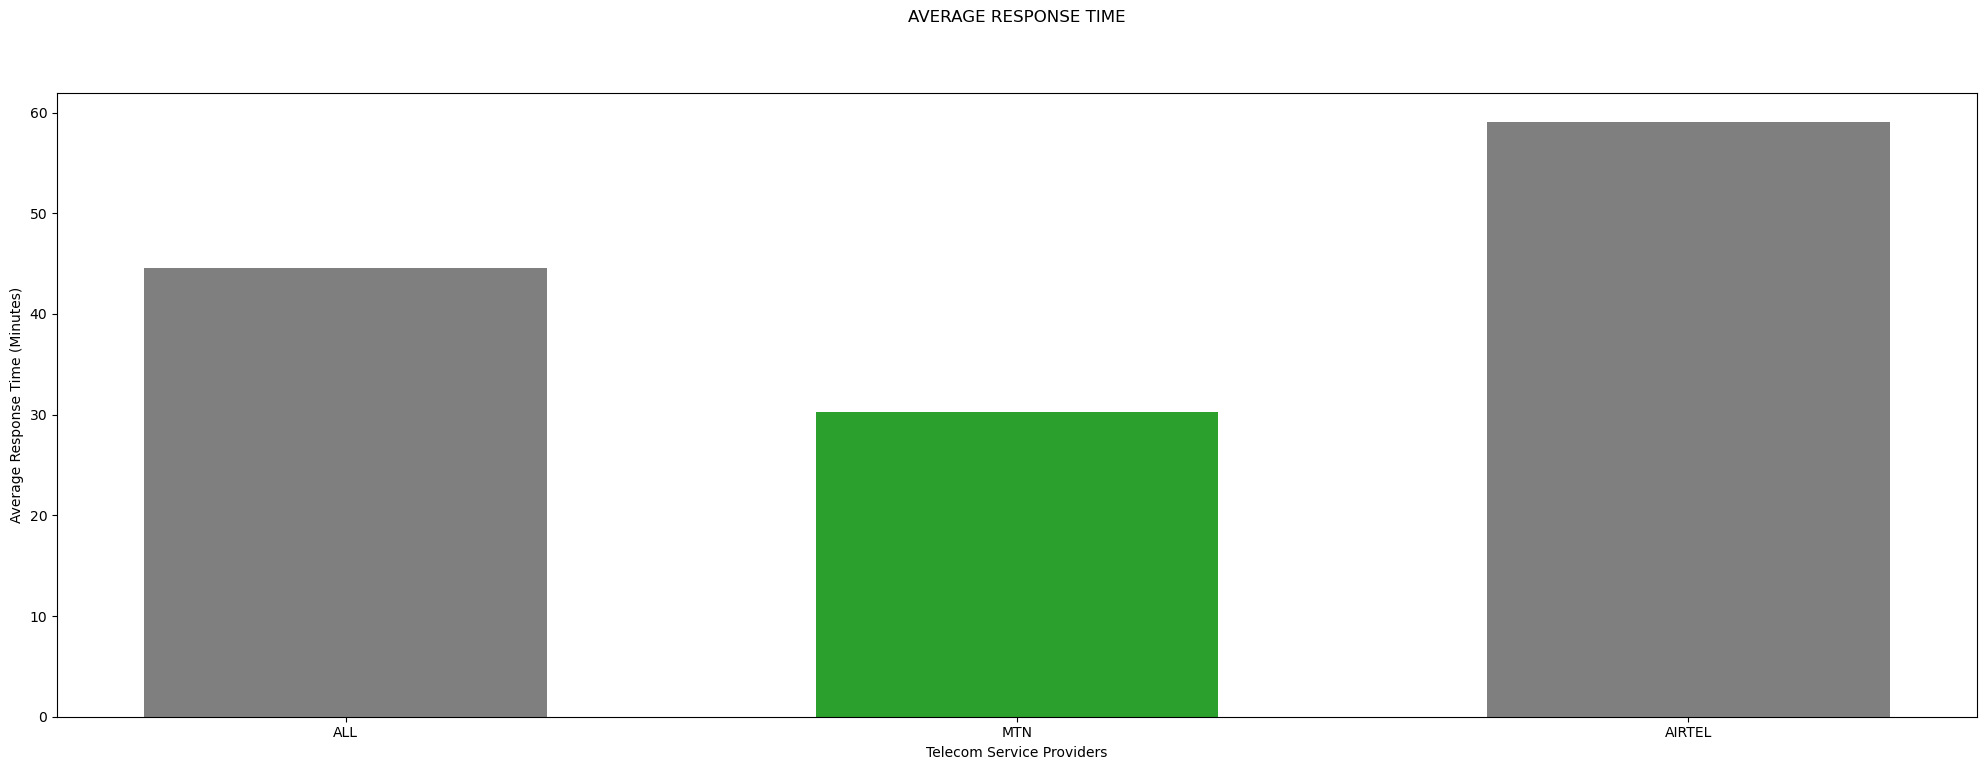

In [10]:
average_response_time_airtel = airtel_df['first_reply_time_secs'].mean() / 60

average_response_time_mtn = mtn_df['first_reply_time_secs'].mean() / 60

average_response_time_all = df['first_reply_time_secs'].mean() / 60

fig = plt.figure()
ax = fig.add_axes([0,0,3,1.3])
values = [average_response_time_all, average_response_time_mtn, average_response_time_airtel]
labels = ['ALL', 'MTN', 'AIRTEL']
ax.bar(labels,values, width=0.6, color=[gray_color, target_color, gray_color])
plt.title('AVERAGE RESPONSE TIME', y=1.1)
plt.xlabel('Telecom Service Providers')
plt.ylabel('Average Response Time (Minutes)')
plt.savefig('average_response_time.jpg', bbox_inches='tight')
plt.show();

### 2. Which percentage of tickets contain sensitive information?

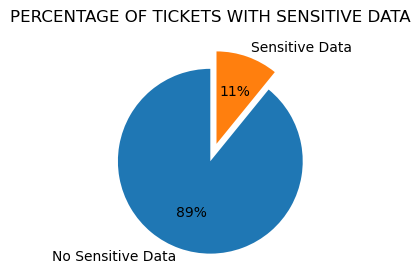

In [11]:
values = df['contains_sensitive_data'].value_counts().reset_index()
labels = df['contains_sensitive_data'].value_counts().rename(index={True: 'Sensitive Data', False: 'No Sensitive Data'}).index

fig = plt.figure(figsize = (7, 2))
plt.pie(data = values, labels = labels, explode = [0,0.3], x = 'contains_sensitive_data', colors = sb.color_palette()[0:2], autopct='%.0f%%', startangle=90, radius=1.5)
plt.title('PERCENTAGE OF TICKETS WITH SENSITIVE DATA', y=1.35)
# plt.savefig('sensitive_data_tickets.jpg', bbox_inches='tight')
plt.show()

### 3. Which percentage of tickets contain media (images, videos) per service provider (and altogether)?

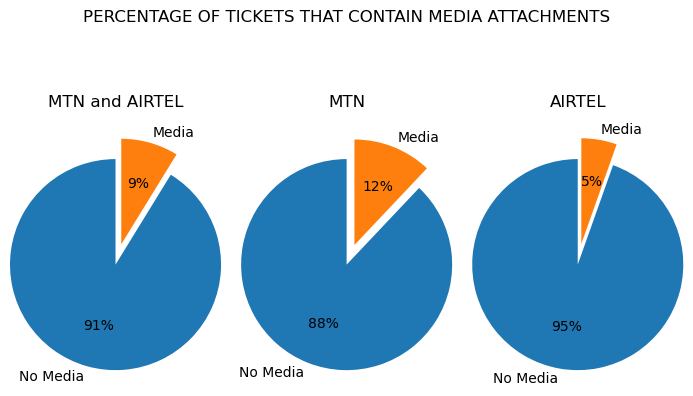

In [12]:
values_all = df['has_media'].value_counts().reset_index()
values_mtn = mtn_df['has_media'].value_counts().reset_index()
values_airtel = airtel_df['has_media'].value_counts().reset_index()
labels = df['has_media'].value_counts().rename(index={True: 'Media', False: 'No Media'}).index

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7,5), layout='tight')
fig.suptitle('PERCENTAGE OF TICKETS THAT CONTAIN MEDIA ATTACHMENTS')
ax1.pie(data = values_all, labels = labels, explode = [0,0.3], x = 'has_media', colors = sb.color_palette()[0:2], autopct='%.0f%%', startangle=90, radius=1.5)
ax1.set_title('MTN and AIRTEL', y=1.35)
ax2.pie(data = values_mtn, labels = labels, explode = [0,0.3], x = 'has_media', colors = sb.color_palette()[0:2], autopct='%.0f%%', startangle=90, radius=1.5)
ax2.set_title('MTN', y=1.35)
ax3.pie(data = values_airtel, labels = labels, explode = [0,0.3], x = 'has_media', colors = sb.color_palette()[0:2], autopct='%.0f%%', startangle=90, radius=1.5)
ax3.set_title('AIRTEL', y=1.35)
plt.show()

### 5. How many tickets were fit for a forum?

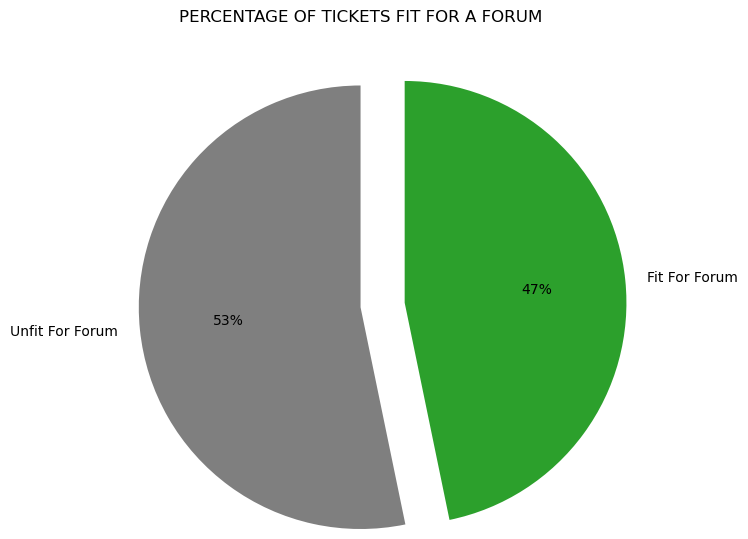

False    534
True     469
Name: fit_for_forum, dtype: int64

In [13]:
values = df['fit_for_forum'].value_counts().reset_index()
labels = df['fit_for_forum'].value_counts().rename(index={True: 'Fit For Forum', False: 'Unfit For Forum'}).index

plt.pie(data = values, labels = labels, explode = [0,0.3], x = 'fit_for_forum', colors = [gray_color, target_color], autopct='%.0f%%', startangle=90, radius=1.5)
plt.title('PERCENTAGE OF TICKETS FIT FOR A FORUM', y=1.25)
plt.savefig('fit_for_forum.jpg', bbox_inches='tight')
plt.show()

df['fit_for_forum'].value_counts()

### 6. What is the distribution of tickets among the ticket types?

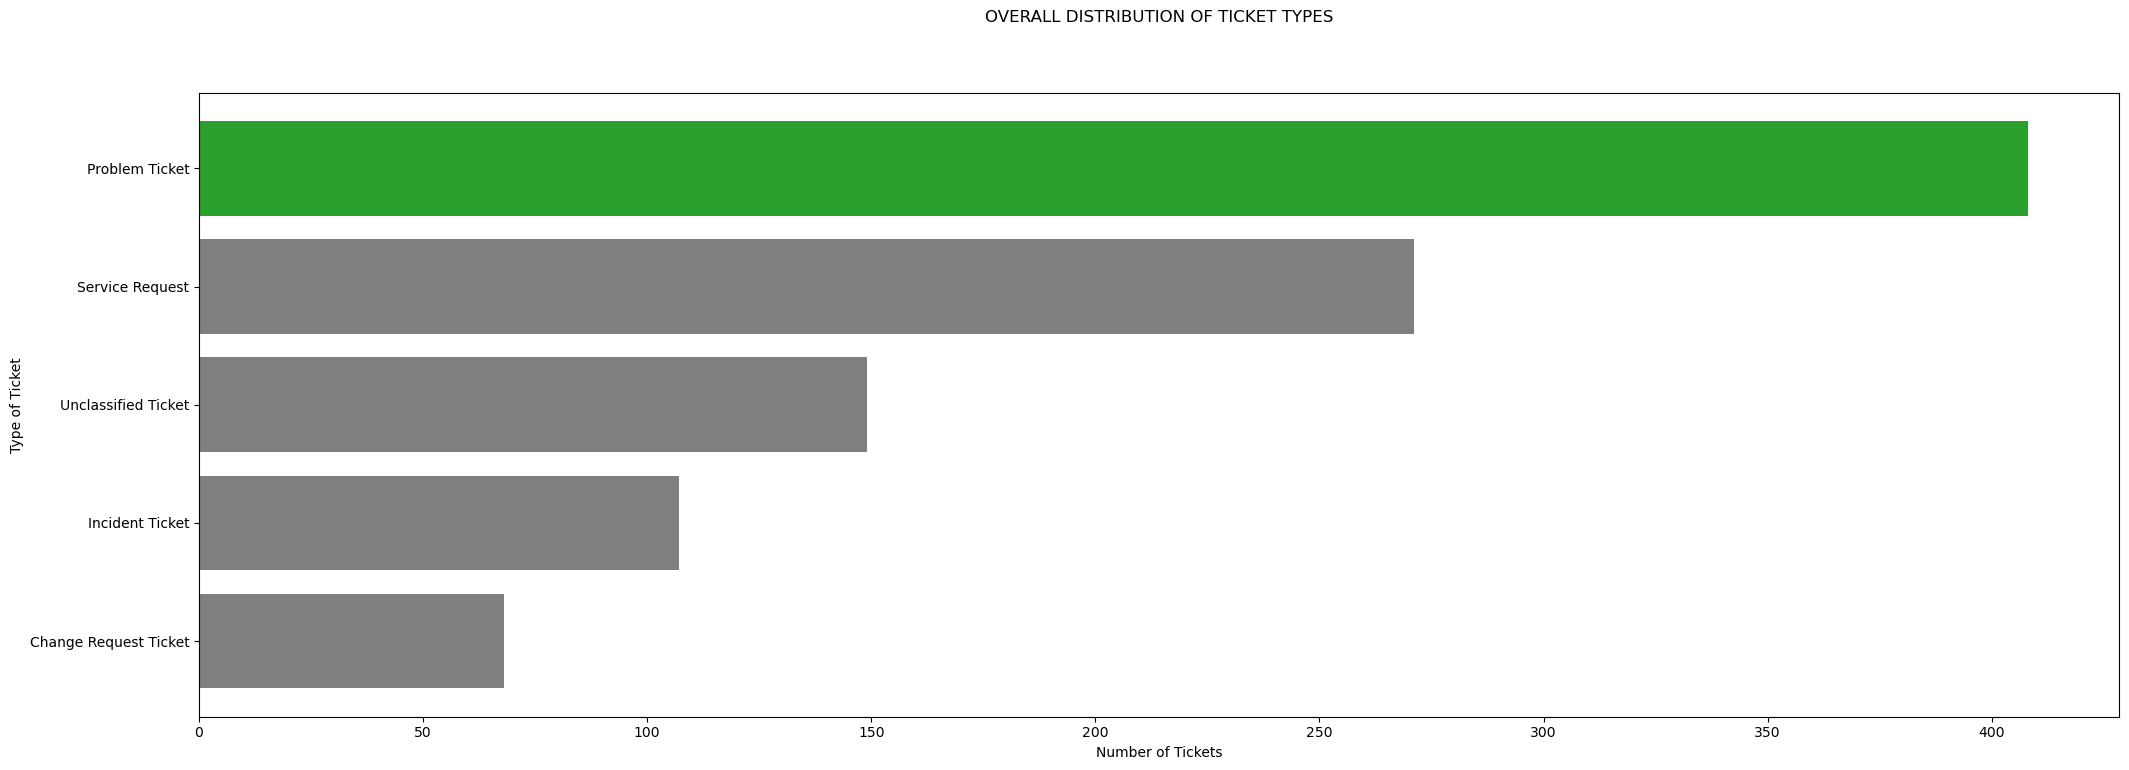

Problem Ticket           408
Service Request          271
Unclassified Ticket      149
Incident Ticket          107
Change Request Ticket     68
Name: ticket_type, dtype: int64

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,1.3])
labels = df['ticket_type'].value_counts(ascending=True).index
values = df['ticket_type'].value_counts(ascending=True).values
ax.barh(labels,values, color=[gray_color, gray_color, gray_color, gray_color, target_color])
plt.title('OVERALL DISTRIBUTION OF TICKET TYPES', y=1.1)
plt.xlabel('Number of Tickets')
plt.ylabel('Type of Ticket')
plt.savefig('ticket_types.jpg', bbox_inches='tight')
plt.show();

df['ticket_type'].value_counts()

### 7. How many tickets were fit for a self help knowledge repository?

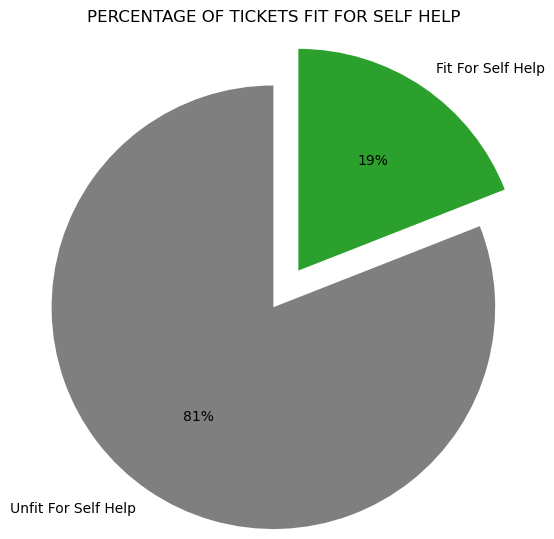

False    812
True     191
Name: fit_for_self_help, dtype: int64

In [15]:
values = df['fit_for_self_help'].value_counts().reset_index()
labels = df['fit_for_self_help'].value_counts().rename(index={True: 'Fit For Self Help', False: 'Unfit For Self Help'}).index

plt.pie(data = values, labels = labels, explode = [0,0.3], x = 'fit_for_self_help', colors = [gray_color, target_color], autopct='%.0f%%', startangle=90, radius=1.5)
plt.title('PERCENTAGE OF TICKETS FIT FOR SELF HELP', y=1.25)
plt.savefig('fit_for_self_help.jpg', bbox_inches='tight')
plt.show()

df['fit_for_self_help'].value_counts()

### 8. What is the distribution of tickets among the tier levels of support?

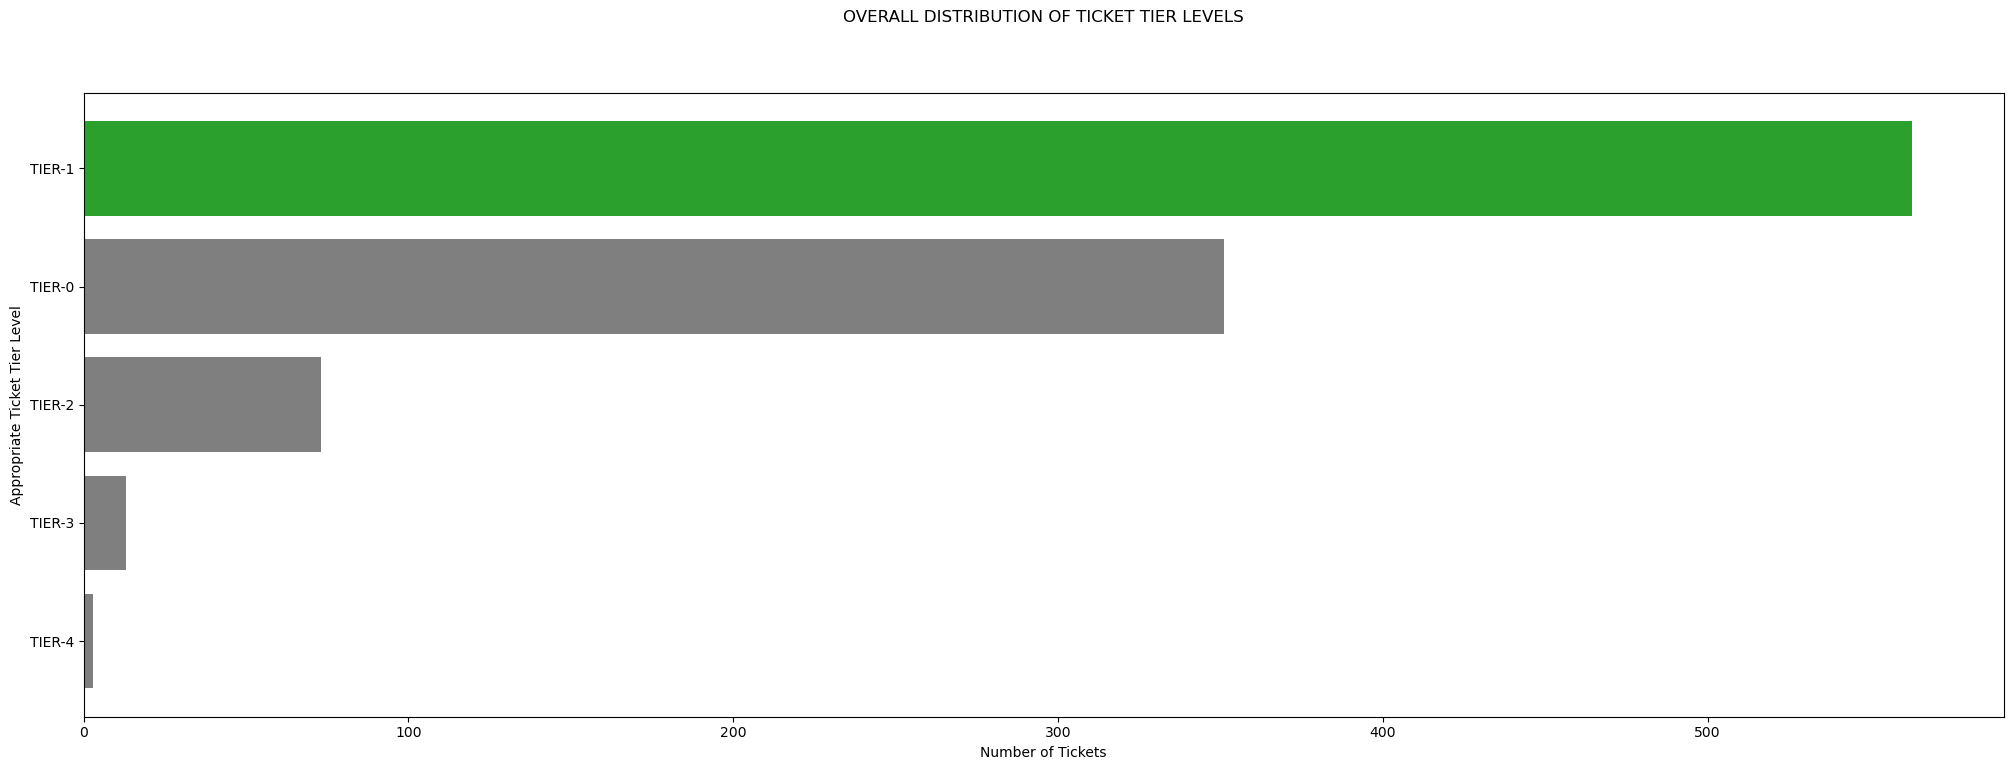

TIER-1    563
TIER-0    351
TIER-2     73
TIER-3     13
TIER-4      3
Name: tier_level, dtype: int64

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,1.3])
labels = df['tier_level'].value_counts(ascending=True).index
values = df['tier_level'].value_counts(ascending=True).values
ax.barh(labels,values, height=0.8, color=[gray_color, gray_color, gray_color, gray_color, target_color])
plt.title('OVERALL DISTRIBUTION OF TICKET TIER LEVELS', y=1.1)
plt.xlabel('Number of Tickets')
plt.ylabel('Appropriate Ticket Tier Level')
plt.savefig('ticket_tier_levels.jpg', bbox_inches='tight')
plt.show();

df['tier_level'].value_counts()

### 10. What is the correlation between total ticket count per agent and their average response time?

In [19]:
# ticket_counts = df['agent_name'].value_counts()

# agents = df['agent_name'].value_counts().index

# mean_response_times = df.groupby(['agent_name']).mean()['first_reply_time_secs']

# columns = ['agent_name', 'ticket_count', 'average_response_time']
# rows = []

# for agent_name_1, ticket_count in ticket_counts.items():
#     for agent_name_2, average_response_time in mean_response_times.items():
#         if agent_name_2.strip() == agent_name_1.strip():
# #             print('1: {} - 2: {}'.format(agent_name_1,agent_name_2))
#             rows.append([agent_name_2, ticket_count, average_response_time / 60])

# main_df = pd.DataFrame(np.array(rows), columns= columns)
# main_df = main_df.astype({'ticket_count': 'float', 'average_response_time': 'float'})
# correlation = main_df['ticket_count'].corr(main_df['average_response_time'])


KeyError: 'agent_name'

NameError: name 'main_df' is not defined

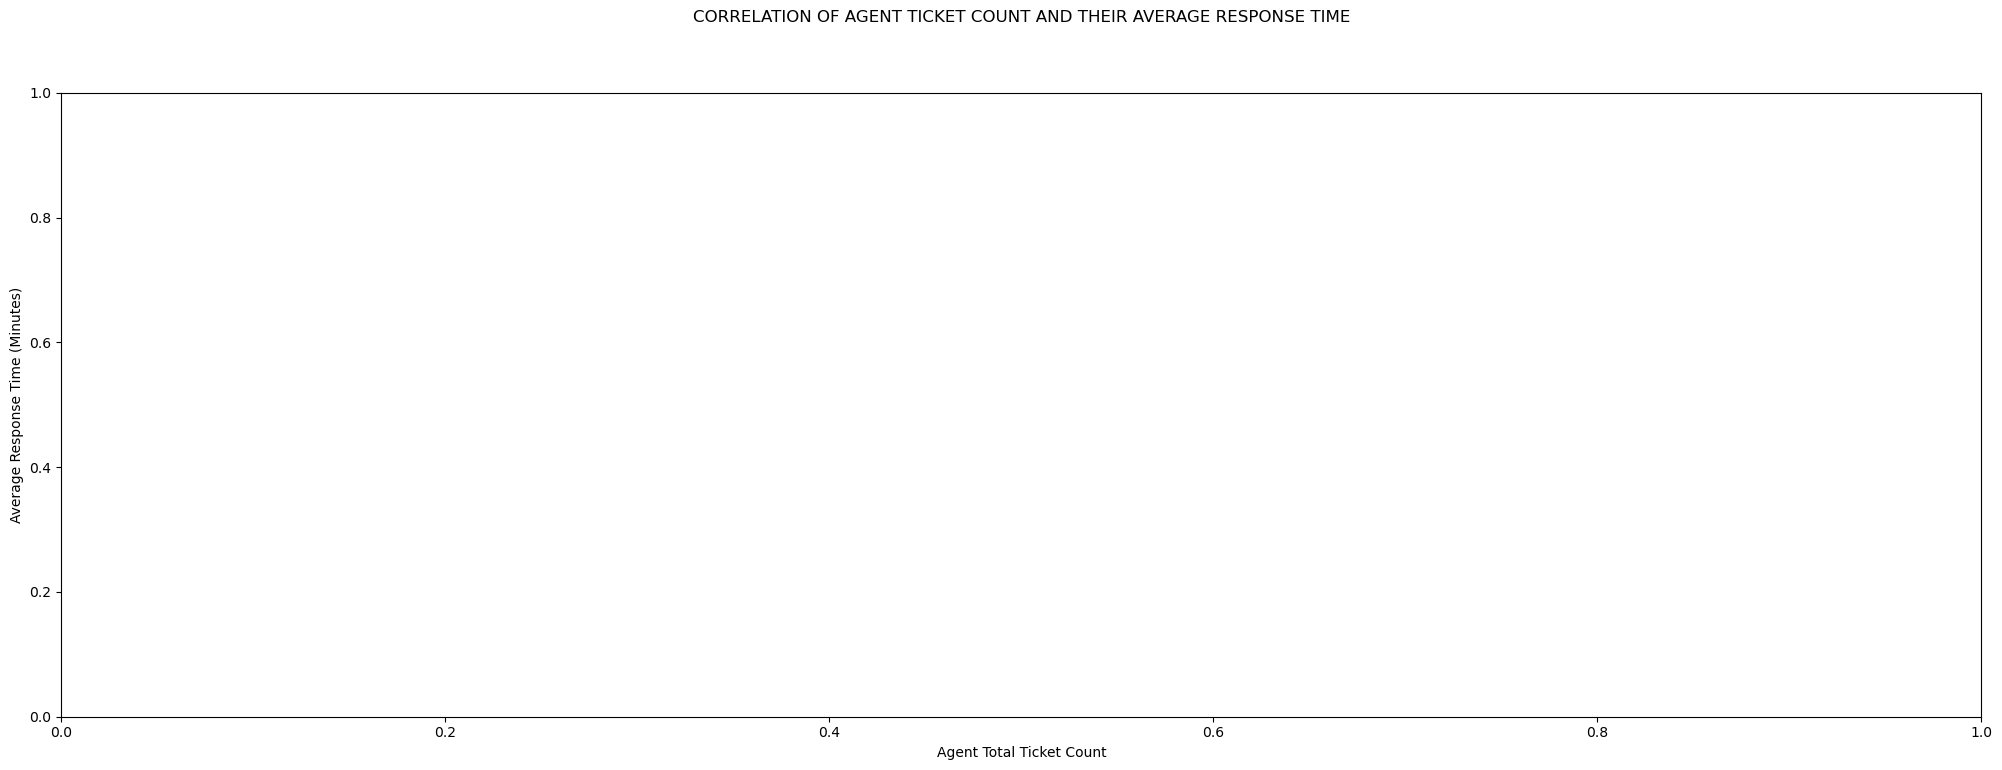

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,1.3])
plt.title('CORRELATION OF AGENT TICKET COUNT AND THEIR AVERAGE RESPONSE TIME', y=1.1)
plt.xlabel('Agent Total Ticket Count')
plt.ylabel('Average Response Time (Minutes)')
ax.scatter(main_df['ticket_count'], main_df['average_response_time'], color=target_color)
ax.plot([0, 1], [0, 1], color=base_color, transform=ax.transAxes)
plt.savefig('ticket_response_time_corr.jpg', bbox_inches='tight');

correlation